# Replication of OMX Stockholm 30 Index using ETF

As of the day of the writting, Quantopian doesn't hold data over indexes.
Pipeline domains[3] is used to select the Swedish equity market.

### References
1. [OMXS30 official page](http://www.nasdaqomxnordic.com/indexes/index_info?Instrument=SE0000337842)
2. [XACT OMXS30 official page](https://www.xact.se/etf-utbud/Aktiemarknad/XACT-OMXS30/)
3. [Pipeline Domains](https://www.quantopian.com/docs/api-reference/pipeline-api-reference#domains)

In [49]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import EquityPricing
from quantopian.pipeline.data.factset import EquityMetadata
from quantopian.pipeline.domain import SE_EQUITIES
from quantopian.pipeline.filters import StaticAssets
from quantopian.research import run_pipeline

def make_pipeline():
    
    # EquityPricing DataSet
    close  = EquityPricing.close.latest
    volume = EquityPricing.volume.latest

    listing_currency = EquityMetadata.listing_currency.latest
    listing_exchange = EquityMetadata.listing_exchange.latest
    
    # Restrict the base universe to XACT OMXS30
    # Reference: https://www.xact.se/etf-utbud/Aktiemarknad/XACT-OMXS30/
    base_universe = StaticAssets(symbols([1220815282779972,]))

    pipe = Pipeline(
        columns={
            'close' : close,
        },
        domain=SE_EQUITIES,
        screen=base_universe,
    )
    return pipe

# set start and end dates and stock  
start_date='2017-11-01'
end_date='2018-11-01'

output = run_pipeline(make_pipeline(), start_date, end_date)

In [50]:
import qgrid
qgrid.show_grid(output)

QgridWidget(grid_options={'highlightSelectedRow': True, 'fullWidthRows': True, 'rowHeight': 28, 'enableColumnR���

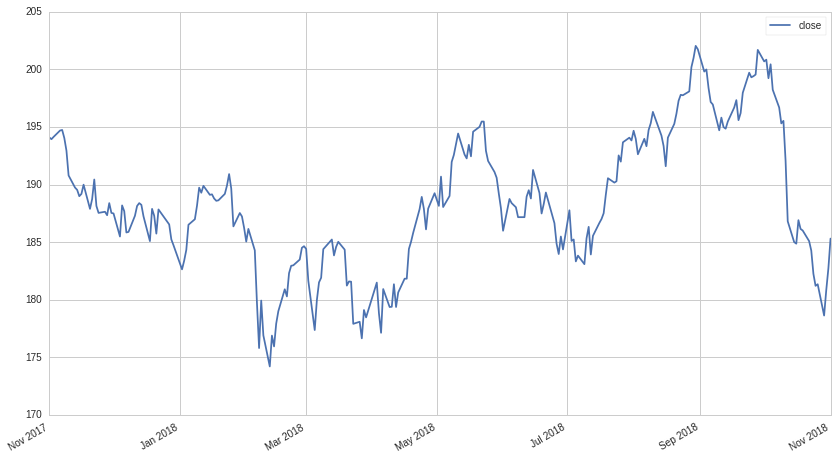

In [53]:
output.xs(symbols(1220815282779972), level=1).plot()